# Visualizations for business questions

# Contents
# 1. Create Histogram
# 2. Create bar chart
# 3. Create sample of data
# 4. Create line plot
# 5. Create scatterplot
# 6. Save visualizations

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# def file path
path = r'/Users/alison/Documents/Data Analysis - Tasks/Instacart  Basket Analysis' 
#get latest df version
merged_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_all.pkl'))

In [4]:
merged_all.shape

(32404859, 34)

In [7]:
merged_all.head()

,user_id,First Name,Last_name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,...,price_range_loc,Busiest_days,busiest period of day,max_order,loyalty_flag,av_product_price,spending_flag,Frequent customer,frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Busiest days,most_orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,most_orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Busiest days,most_orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,most_orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Slowest days,most_orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


# 1. Create Histogram

<Axes: ylabel='Frequency'>

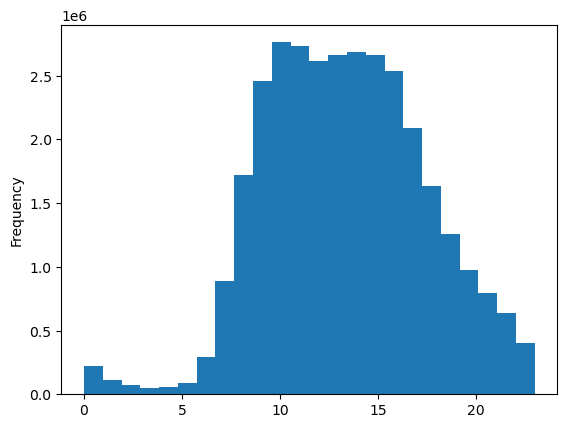

In [9]:
#You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
#In a markdown cell beneath your histogram, describe what the histogram demonstrates.
merged_all['order_hour_of_day'].plot.hist(bins = 24)

# The histogram is showing what we have investigated in previous exercises. The busiest times of the day (highest frequency) are business hours 9-5pm, with a slight preference for the morning. Orders in the evening are at a moderate frequency and the 10pm-6am period has the lowest frequency of orders. 

# 2. Create bar chart

<Axes: xlabel='loyalty_flag'>

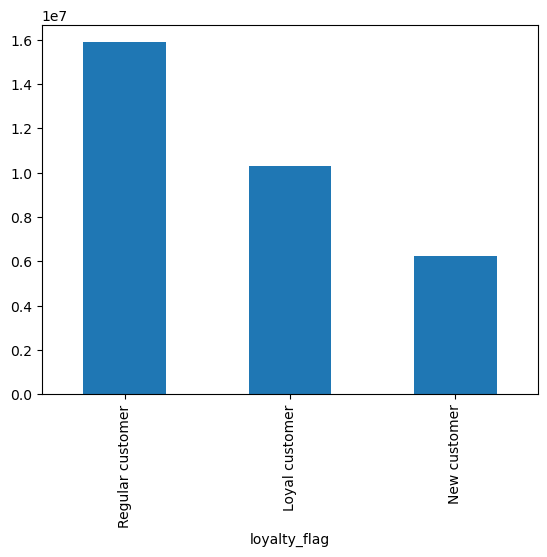

In [11]:
# The marketing team is curious about the distribution of orders among customers in terms of loyalty. 
# Create a bar chart from the “loyalty_flag” column.
merged_all['loyalty_flag'].value_counts().plot.bar()

# 3. Create sample of data

In [13]:
# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
# Due to limited computing space, first create a sample of the data with 70/30 split
np.random.seed(4)
dev = np.random.rand(len(merged_all)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [17]:
# store 70% in big
big = merged_all[dev]

In [19]:
# store 30% in small
small = merged_all[~dev]

In [21]:
#check sample was drawn correctly by size
len(merged_all)

32404859

In [23]:
len(big) + len(small)

32404859

In [25]:
# create smaller df with only the necessary variables to save on power
df_2 = small[['order_hour_of_day','prices']]

# 4. Create line plots

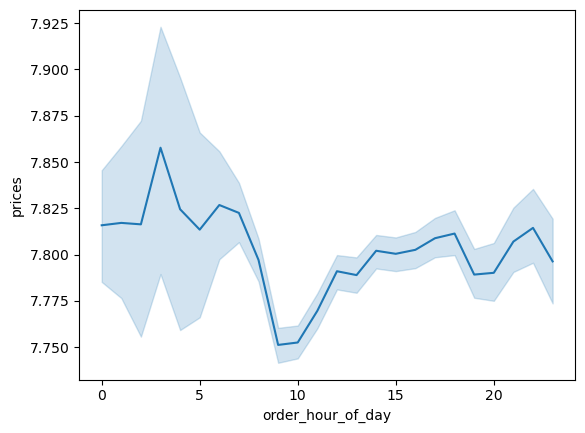

In [27]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

### There is a difference in expenditure depending on hour of the day. The most expensive products sell best at 3am. 
# Products with the lowest prices sell around 10am. Products with moderate prices are purchased in the afternoon and evening.

In [29]:
# Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. 
# First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
#In a markdown cell beneath your line chart, describe what the line chart shows.
# Using the sample already drawn, create new dataframe from '' and '' columns.
df_3 = small[['Age','n_dependants']]

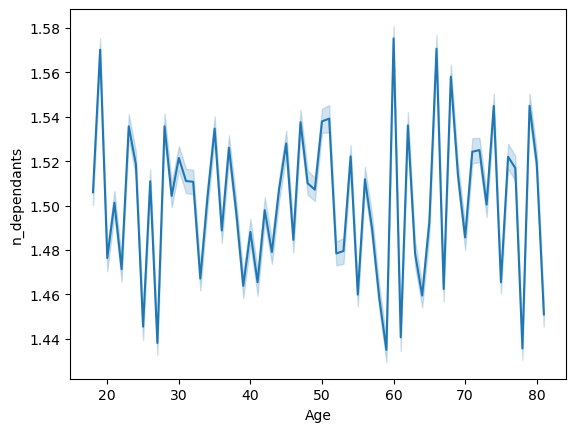

In [31]:
line2 = sns.lineplot(data = df_3, x = 'Age',y = 'n_dependants')

# There are no ready conclusions from the line chart. I would have expected to see more of a bell curve, with people aged 30-50 having the most dependents. This may be worth investigating as it's unusual that people 60+ have dependents or that people younger than 20 have the highest number of dependents. 

# 5. Create scatterplot

<Axes: xlabel='Age', ylabel='income'>

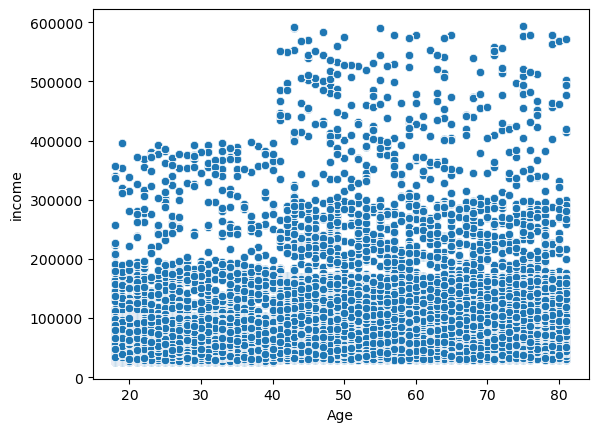

In [33]:
# You’ll also need to explore whether there’s a connection between age and spending power (income). 
# To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
# In a markdown cell beneath your scatterplot, describe what the scatterplot shows.
sns.scatterplot(x = 'Age', y = 'income',data = merged_all)

# The scatterplot doesn't show a strong correlation between age and income. Most customers across ages earn under 200,000. Only customers aged 40+ earn more than 400,000. Few younger customers (under 40s) earn 200,000-400,000. There is a higher density of customers over 40 who earn between 200,000-300,000 than those under 40. 

# 6. Save visualizations

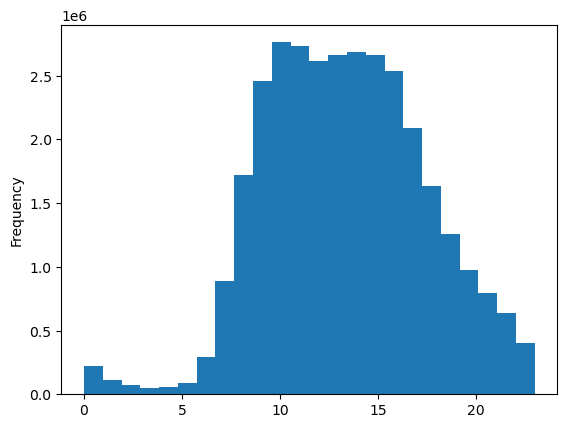

In [35]:
# Export your visualizations as “.png” files in your relevant project folder.
# Chart 1 histogram
histogram = merged_all['order_hour_of_day'].plot.hist(bins = 24)
histogram.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hour_day_histogram.png'))

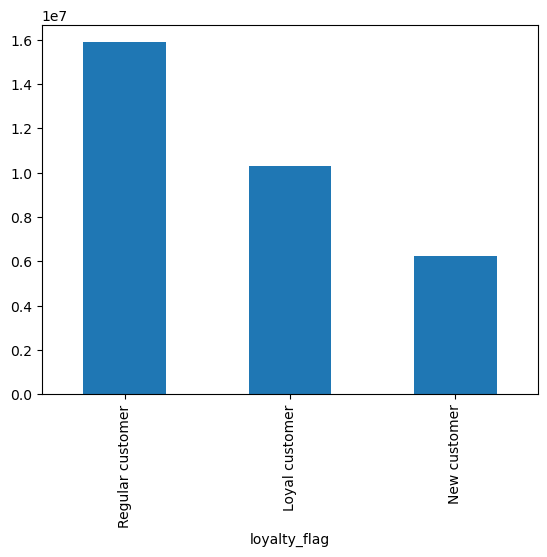

In [37]:
#Chart 2 bar
bar = merged_all['loyalty_flag'].value_counts().plot.bar()
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyalty_bar.png'))

In [39]:
#Chart 3 line 1
line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hour_day_prices_line.png'))

In [41]:
#Chart4 line 2
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_deps_line.png'))

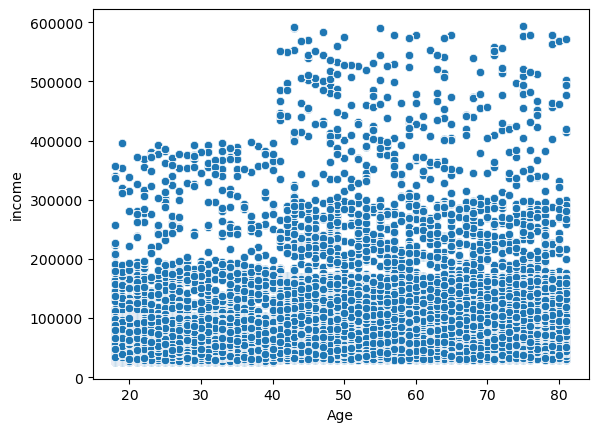

In [43]:
#Chart 5 scatterplot
scatter = sns.scatterplot(x = 'Age', y = 'income',data = merged_all)
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_income_scat.png'))